# GMIT - Fundamentals of Data Analysis
## <font color='purple'>**Assessment 2019: Tips dataset Analysis**</font>

![Image](https://www.tripsavvy.com/thmb/aXTGXSsrJi9QYh3RPCzNfLhu63E=/950x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-184868831-5c352fd746e0fb00017c4bc7.jpg)

### **About Tips dataset**
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. 

**Each record includes:**
-	Total bill - Total bill (cost of the meal), including tax, in US dollars
-	Tip - Tip (gratuity) in US dollars
-	Sex - Sex of person paying for the meal (male/female)
-	Smoker - Smoker in party? (No/Yes)
-	Day - Thursday, Friday, Saturday or Sunday
-	Time - Day or Night
-	Size - Size of the party

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# Importing the tips dataset from the local file
df = pd.read_csv("Tips.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

### <font color='purple'>Descriptive statistics</font>

**Qualitative Data**

The Tips dataset includes the following Qualitative data:
- Sex
- Smoker
- Day
- Time

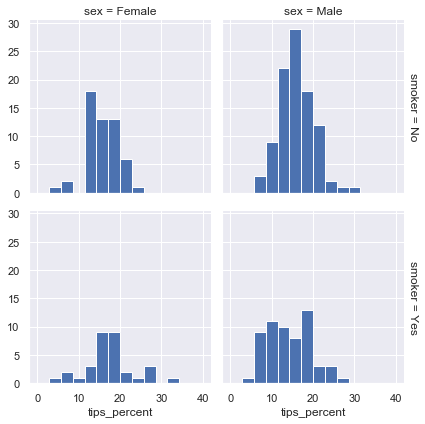

In [36]:
df['tips_percent'] = 100 *(df['tip'] / df['total_bill'])
grid = sns.FacetGrid(df, row = "smoker", col = "sex", margin_titles=True)
grid.map(plt.hist, "tips_percent", bins=np.linspace(0, 40, 15))
# grid = sns.FacetGrid(df, row="sex", col="smoker", margin_titles=True)
# grid.map(plt.hist, "tips_percent", bins=np.linspace(0, 40, 15));

<font color='red'>From the histogram above we can see that the percentage of the most of tips varies between 10% and 20%, however it's interesting that the female smokers and male non-smokers seems to leave higher percentage (above 30% of total bill). </font>

C:\Users\I304319\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


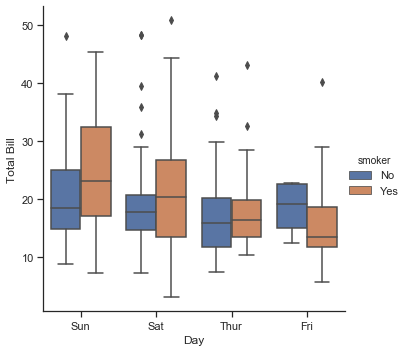

In [48]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "smoker", data=df, kind="box")
    g.set_axis_labels("Day", "Total Bill")

<font color='red'> as we can see from the above factor plot, the smokers have spent a way more in the restaurant on Saturday and Sunday, however there is almost no difference on the total bills for smokers and no-smokers on Thursday, and on Friday smokers spent even less comparing to non-smokers. </font>

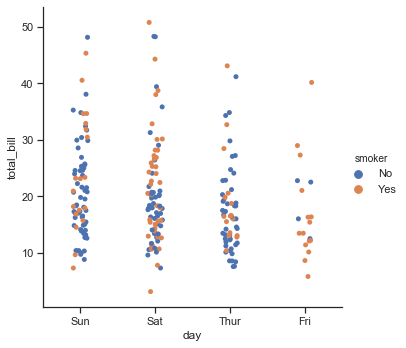

In [54]:
sns.set(style="ticks")
g = sns.catplot(x="day", y="total_bill", hue="smoker", data=df)

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<font color='red'>Describe here the results of the table above</font>

**Quantitative Data**

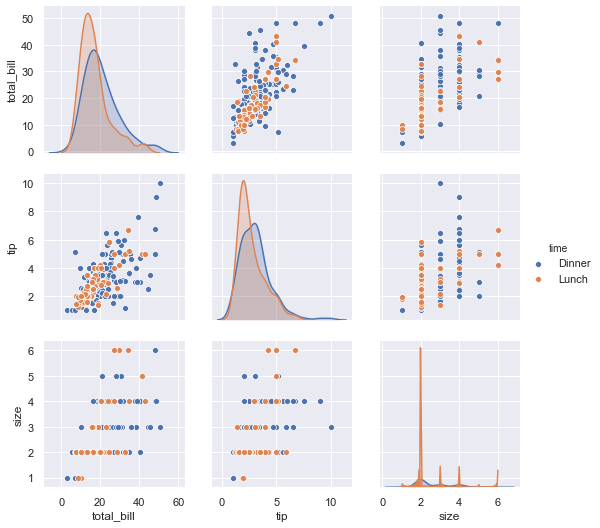

In [13]:
sns.pairplot(df, hue='time')